<a href="https://colab.research.google.com/github/JANANI-B-S/EDA/blob/main/disney%2Bhotstar(eda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                   EXPLORATORY DATA ANALYSIS OF DISNEY+HOTSTAR DATASET

### ***DATA PREPROCESSING***

In [120]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [121]:
import pandas as pd
df=pd.read_csv("/content/sample_data/disney_plus_titles.csv")
print(df.head())
print(df.info())
print(df.shape)

  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

In [122]:
print(df.isnull().sum())

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64


In [123]:
df['director'].fillna("Unknown",inplace=True);
df['country'].fillna("Unknown",inplace=True);
df['cast'].fillna("Unknown",inplace=True);
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          2
duration        0
listed_in       0
description     0
dtype: int64


<ipython-input-123-3b3d6c23879c>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-123-3b3d6c23879c>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [124]:
df.dropna(subset=['title', 'type', 'release_year'], inplace=True)
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          2
duration        0
listed_in       0
description     0
dtype: int64


In [125]:
most_common_rating=df['rating'].mode()[0]
df['rating'].fillna(most_common_rating,inplace=True)
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<ipython-input-125-9d73b8cfbaf3>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [126]:
import random
from datetime import datetime

def estimate_date(row):
    if pd.isnull(row['date_added']):
        year = row['release_year']
        random_date = f"{random.randint(1, 12)}-{random.randint(1, 28)}-{year}"
        return pd.to_datetime(random_date, errors='coerce')  # Convert to date format
    return row['date_added']

df['date_added'] = df.apply(estimate_date, axis=1)
print(df.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [127]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['release_year'] = df['release_year'].astype(int)
df['rating']=df['rating'].str.strip().str.upper()


In [128]:
def convert_duration(value):
  if "min" in value:
    return int(value.replace("min",""))
  elif "Season" in value or "Seasons" in value:
     return int(value.split()[0])
  return None
df['duration']=df['duration'].astype(str).apply(convert_duration)

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['duration_normalized'] = scaler.fit_transform(df[['duration']])


In [130]:
import numpy as np
numerical_cols=df.select_dtypes(include=np.number);
print(numerical_cols)

      release_year  duration  duration_normalized
0             2021        88             0.478022
1             2011        93             0.505495
2             2014       127             0.692308
3             2019         2             0.005495
4             2021         1             0.000000
...            ...       ...                  ...
1363          1963        80             0.434066
1364          1965       132             0.719780
1365          2014         3             0.010989
1366          2016         2             0.005495
1367          2008         3             0.010989

[1368 rows x 3 columns]


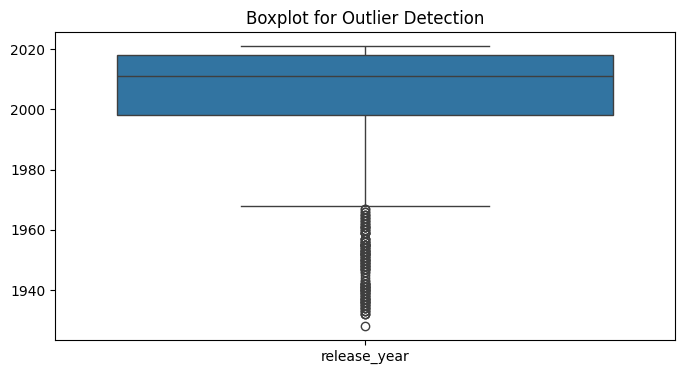

In [131]:
numerical_cols = ['release_year']

# Boxplot to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()


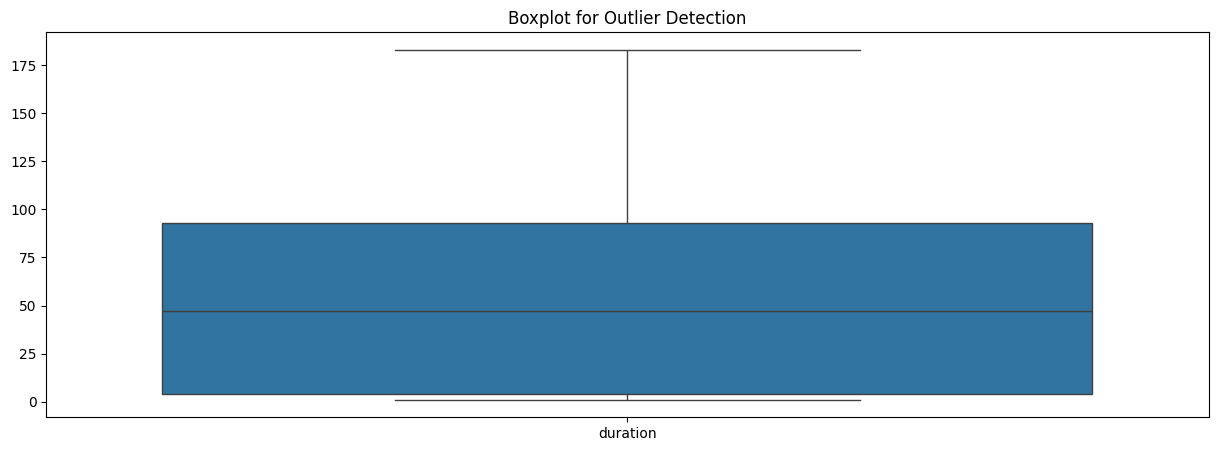

In [132]:
numerical_cols = ['duration']

# Boxplot to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()


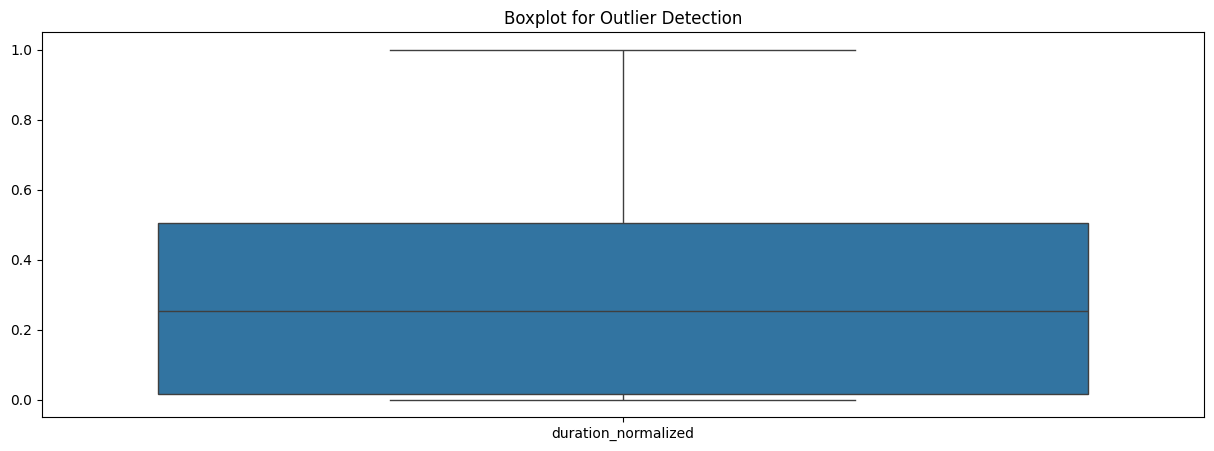

In [133]:
numerical_cols = ['duration_normalized']

# Boxplot to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [134]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)} found")
    return outliers

for col in ['release_year', 'duration', 'duration_normalized']:
    detect_outliers_iqr(df, col)



Outliers in release_year: 151 found
Outliers in duration: 0 found
Outliers in duration_normalized: 0 found


In [135]:
import numpy as np

Q1 = np.percentile(df['release_year'], 25)  # 25th percentile
Q3 = np.percentile(df['release_year'], 75)  # 75th percentile
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
df['release_year'] = np.where(df['release_year'] < lower_bound, lower_bound, df['release_year'])
df['release_year'] = np.where(df['release_year'] > upper_bound, upper_bound, df['release_year'])



Lower Bound: 1968.0, Upper Bound: 2048.0


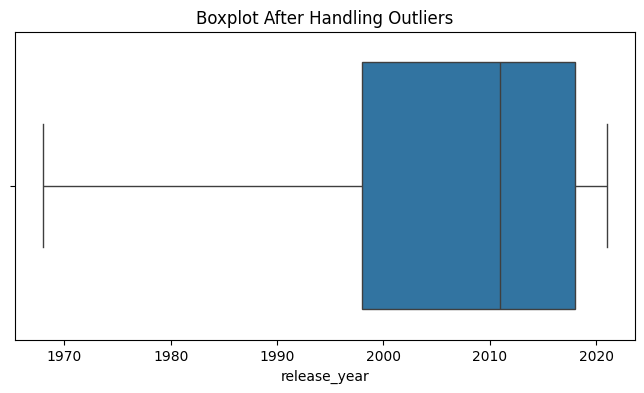

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['release_year'])
plt.title("Boxplot After Handling Outliers")
plt.show()


In [137]:
print(df.isnull().sum())  # Count missing values in each column
print(df.duplicated().sum())  # Count duplicate rows


show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added             0
release_year           0
rating                 0
duration               0
listed_in              0
description            0
duration_normalized    0
dtype: int64
0


In [138]:
df.describe()  # Summary statistics


,date_added,release_year,duration,duration_normalized
count,1368,1368.000000,1368.000000,1368.000000
mean,2020-04-12 15:45:15.789473536,2004.519006,53.529971,0.288626
min,2008-06-26 00:00:00,1968.000000,1.000000,0.000000
25%,2019-11-12 00:00:00,1998.000000,4.000000,0.016484
50%,2019-11-12 00:00:00,2011.000000,47.000000,0.252747
75%,2020-09-04 00:00:00,2018.000000,93.000000,0.505495
max,2021-09-24 00:00:00,2021.000000,183.000000,1.000000
std,NaN,16.806170,46.629379,0.256205


In [139]:
df.to_csv('cleaned_disney_hotstar.csv', index=False)  # `index=False` removes extra index column


**ANALYSING CLEANED DATASET**

In [140]:
df=pd.read_csv("/content/cleaned_disney_hotstar.csv")
print(df.info())  # Check dataset structure
print(df.describe())  # Summary statistics




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   show_id              1368 non-null   object 
 1   type                 1368 non-null   object 
 2   title                1368 non-null   object 
 3   director             1368 non-null   object 
 4   cast                 1368 non-null   object 
 5   country              1368 non-null   object 
 6   date_added           1368 non-null   object 
 7   release_year         1368 non-null   float64
 8   rating               1368 non-null   object 
 9   duration             1368 non-null   int64  
 10  listed_in            1368 non-null   object 
 11  description          1368 non-null   object 
 12  duration_normalized  1368 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 139.1+ KB
None
       release_year     duration  duration_normalized
count   1368.000000

BASIC INSIGHTS


In [ ]:
print("\nTotal Number of Movies vs. TV Shows:\n")
print(df['type'].value_counts())


num_unique_directors = df['director'].nunique()
print(f"\nNumber of Unique Directors: {num_unique_directors}")

num_unique_actors = df['cast'].str.split(', ').explode().nunique()
print(f"Number of Unique Actors: {num_unique_actors}")

genre_counts = df['listed_in'].str.split(', ').explode().value_counts()


print("\nTop 10 Most Common Genres:\n")
print(genre_counts.head(10))

country_counts = df['country'].value_counts()


print("\nTop 10 Countries with the Most Content:\n")
print(country_counts.head(10))





Total Number of Movies vs. TV Shows:

type
Movie      991
TV Show    377
Name: count, dtype: int64

Number of Unique Directors: 579
Number of Unique Actors: 3604

Top 10 Most Common Genres:

listed_in
Family              602
Animation           516
Comedy              497
Action-Adventure    438
Animals & Nature    199
Coming of Age       199
Fantasy             180
Documentary         167
Kids                137
Drama               129
Name: count, dtype: int64

Top 10 Countries with the Most Content:

country
United States                    976
Unknown                          175
United States, Canada             28
United Kingdom                    23
United States, United Kingdom     19
Canada, United States             17
United Kingdom, United States     14
United States, Australia           7
Canada                             5
United States, Japan               4
Name: count, dtype: int64



1)Movies dominate (991) over TV Shows(377), making up 72% of the total content.

2)579 unique directors and 3,604 unique actors contribute to the platform's diversity.

3)Family (602), Animation (516), and Comedy (497) are the most common genres.

 4)The United States leads with 976 titles, followed by some international collaborations.

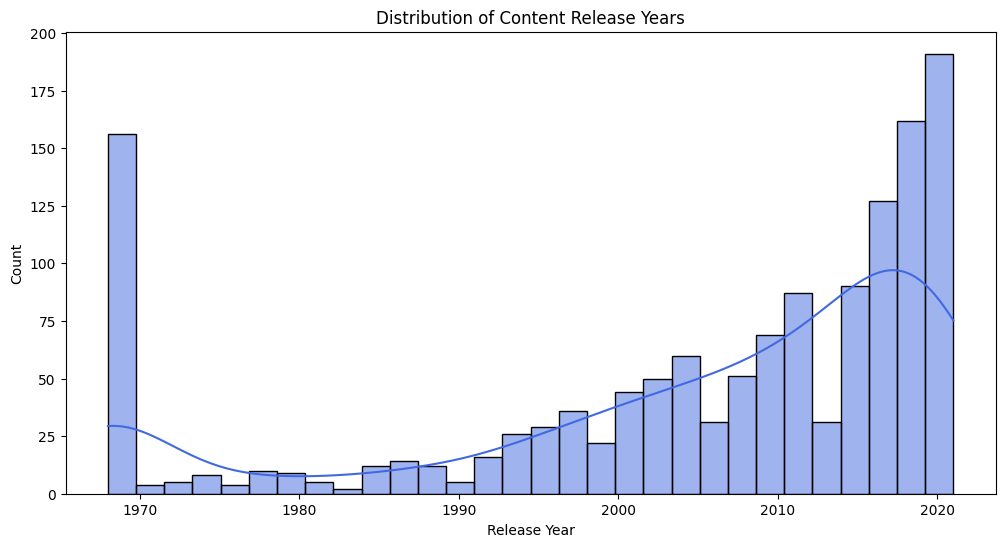

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='royalblue')
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Content Release Years")
plt.show()


2020 had the highest number of content releases, indicating a major push for content creation—possibly influenced by increased demand for streaming services during the COVID-19 pandemic.

<Figure size 1200x600 with 0 Axes>

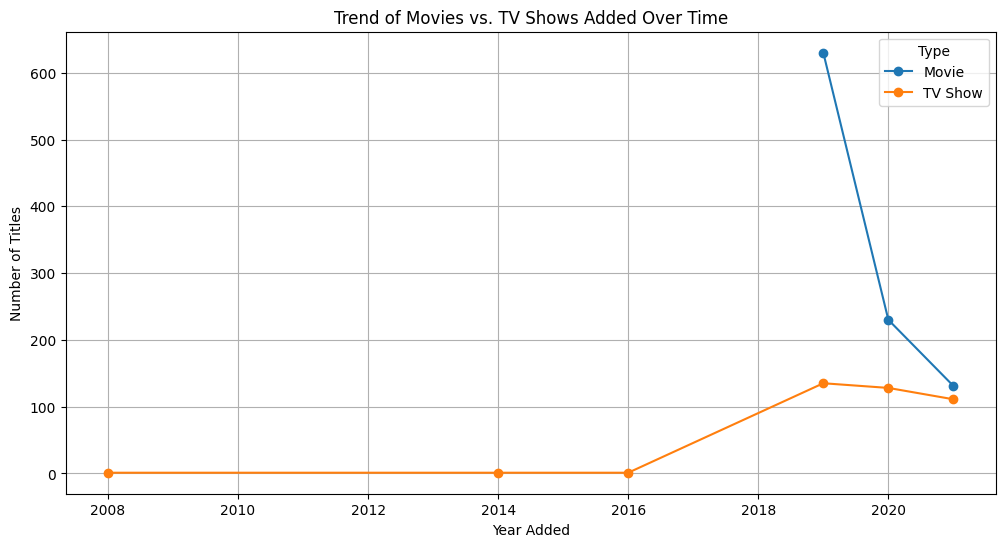

In [ ]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract Year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count Movies & TV Shows added each year
content_trend = df.groupby(['year_added', 'type']).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
content_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("Trend of Movies vs. TV Shows Added Over Time")
plt.legend(title="Type")
plt.grid(True)
plt.show()


TV shows saw steady growth from 2008-2016, peaked around 2019, then slightly declined in after 2020.

The number of movies peaked in 2019 but declined consistently after 2020.

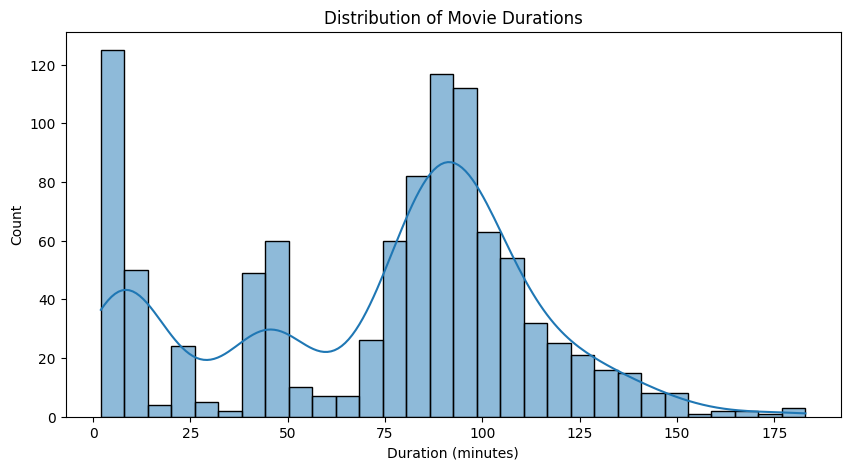

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of movie durations
plt.figure(figsize=(10,5))
sns.histplot(df[df['type'] == 'Movie']['duration'], bins=30, kde=True)
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie Durations")
plt.show()


Most movies have a duration between 80 to 120 minutes, following a typical feature-length pattern.

In [ ]:
df['rating'].value_counts().head(10)


,count
rating,
TV-G,309
TV-PG,275
G,235
PG,227
TV-Y7,130
TV-14,72
PG-13,60
TV-Y,48
TV-Y7-FV,12


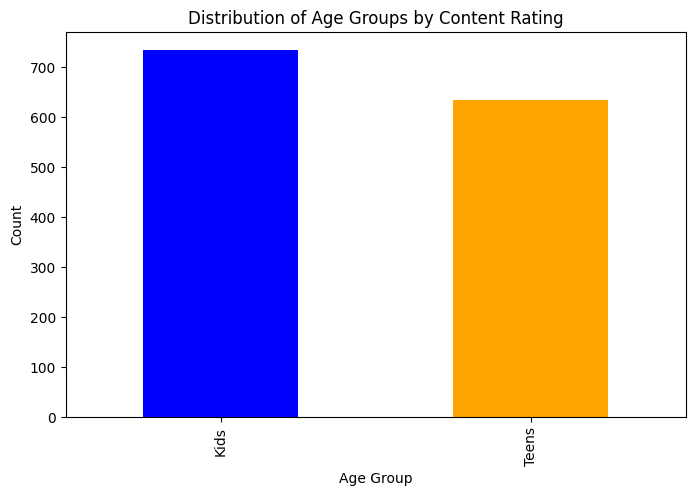

In [ ]:
plt.figure(figsize=(8, 5))
df['Age Group'].value_counts().plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups by Content Rating")
plt.show()


<ipython-input-88-20422000a7de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('type')['duration'].mean().index, y=df.groupby('type')['duration'].mean().values, palette="coolwarm")


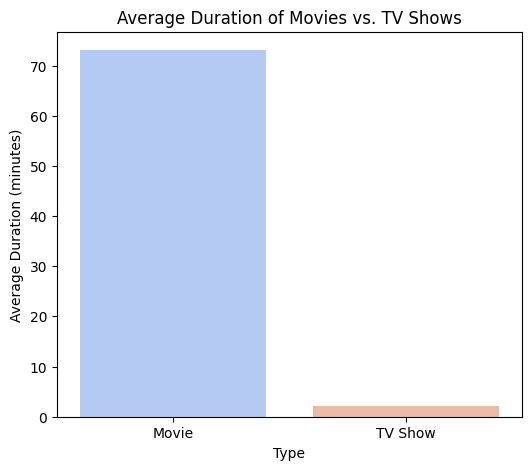

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x=df.groupby('type')['duration'].mean().index, y=df.groupby('type')['duration'].mean().values, palette="coolwarm")
plt.xlabel("Type")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Duration of Movies vs. TV Shows")
plt.show()


Average Duration of Movie Time where much higher than TV Show Duration

<ipython-input-89-2d03113ff29b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['director'].value_counts().index[:10], x=df['director'].value_counts().values[:10], palette="Blues_r")


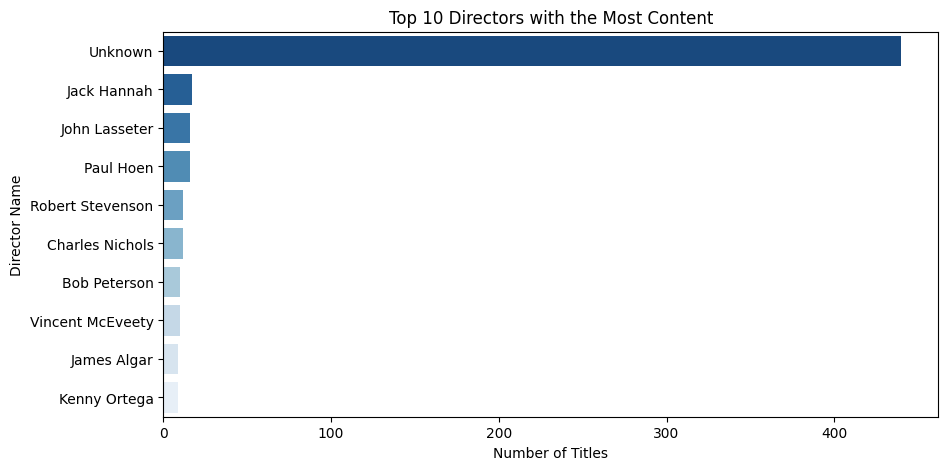

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df['director'].value_counts().index[:10], x=df['director'].value_counts().values[:10], palette="Blues_r")
plt.xlabel("Number of Titles")
plt.ylabel("Director Name")
plt.title("Top 10 Directors with the Most Content")
plt.show()


A bar chart revealed the top 10 directors with the most content on the platform, highlighting key contributors to Disney+ Hotstar.

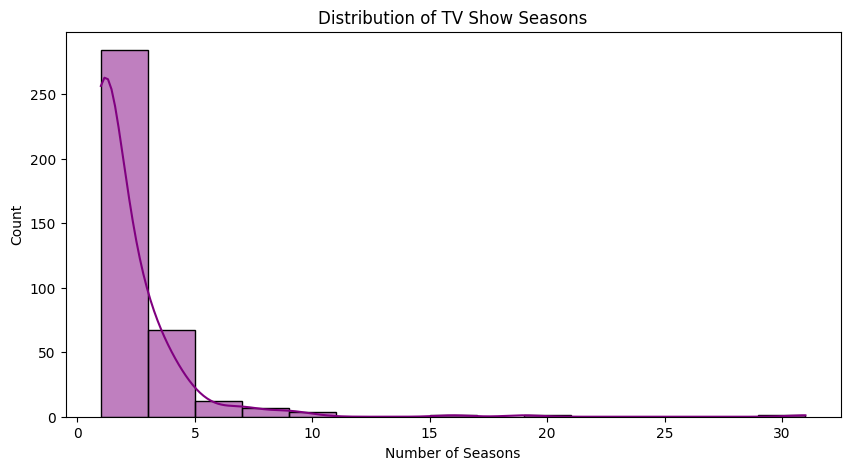

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['type'] == 'TV Show']['duration'], bins=15, kde=True, color="purple")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.title("Distribution of TV Show Seasons")
plt.show()


The majority of TV shows have 1-2 seasons, with only a few having long-running series.

<ipython-input-90-eaccc89f448e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(actors), x=list(counts), palette="Greens_r")


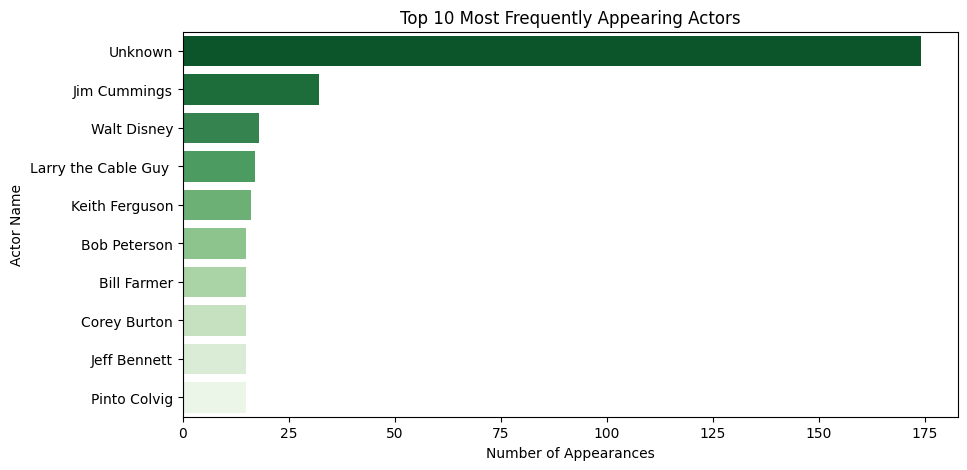

In [ ]:
from collections import Counter

actors_list = df['cast'].dropna().str.split(', ').sum()
top_actors = Counter(actors_list).most_common(10)
actors, counts = zip(*top_actors)

plt.figure(figsize=(10, 5))
sns.barplot(y=list(actors), x=list(counts), palette="Greens_r")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor Name")
plt.title("Top 10 Most Frequently Appearing Actors")
plt.show()


Analyzing the cast data, I identified the top 10 actors who appear in the most titles.

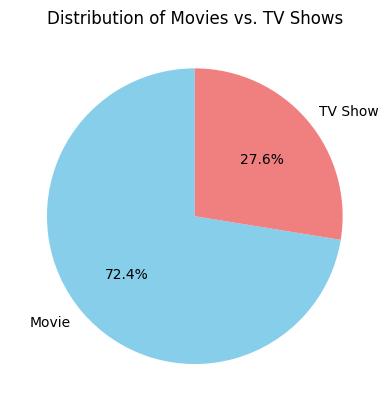

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.ylabel('')
plt.title("Distribution of Movies vs. TV Shows")
plt.show()



<Figure size 1000x800 with 0 Axes>

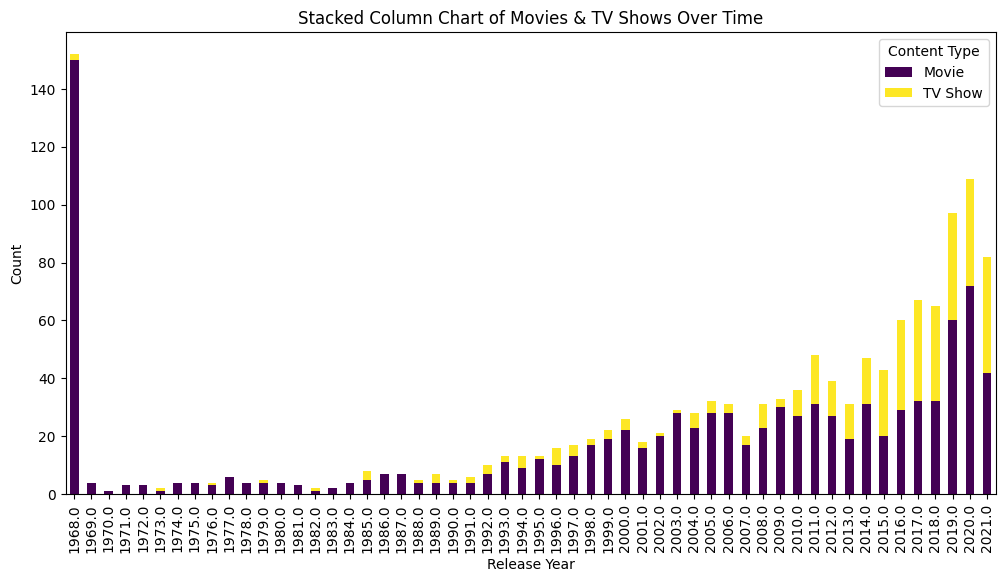

In [141]:
plt.figure(figsize=(10, 8))
df_grouped = df.groupby(['release_year', 'type']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Stacked Column Chart of Movies & TV Shows Over Time")
plt.legend(title="Content Type")
plt.show()


In [ ]:
import plotly.express as px

# Aggregate data
country_count = df['country'].value_counts().reset_index()
country_count.columns = ['Country', 'Number of Titles']

# Create a choropleth map
fig = px.choropleth(country_count,
                     locations='Country',
                     locationmode='country names',
                     color='Number of Titles',
                     title="Content Production by Country",
                     color_continuous_scale='blues')

fig.show()


A choropleth map visualized the global spread of content production, with the United States leading in content contributions.

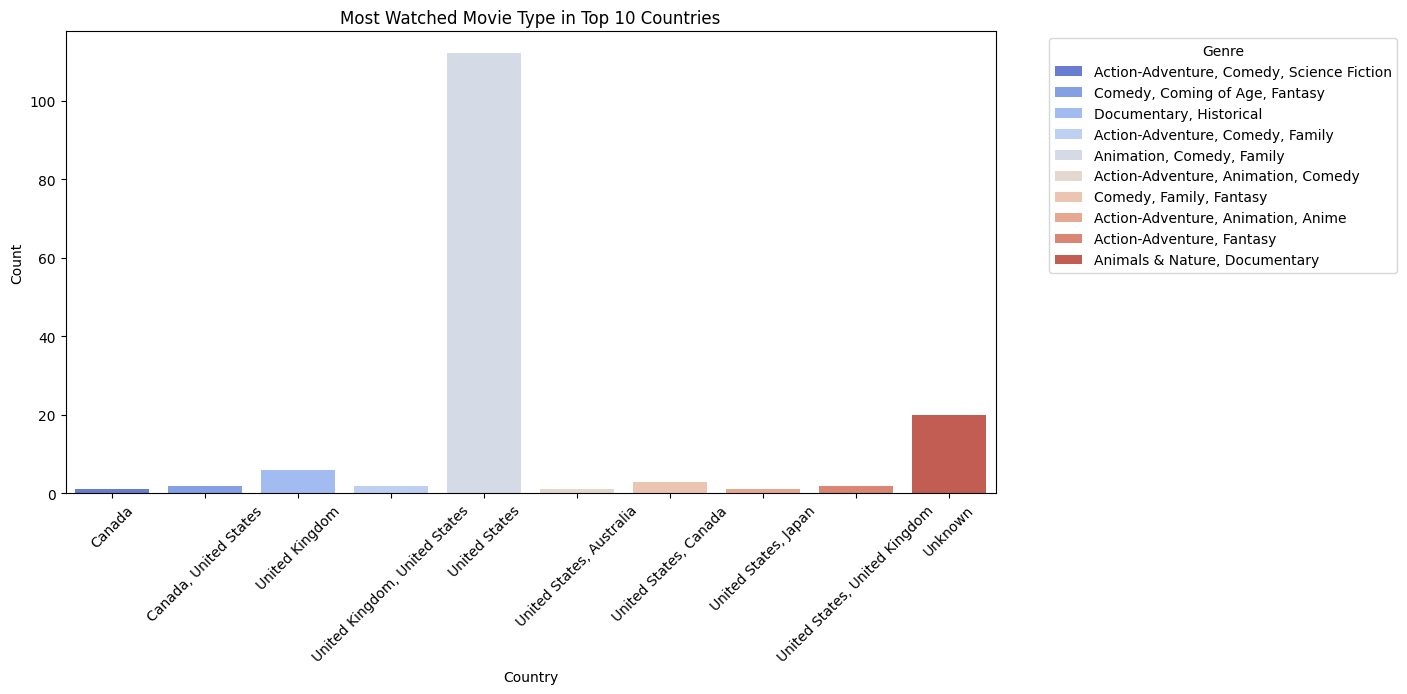

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 countries
top_countries = df['country'].value_counts().index[:10]
df_top_countries = df[df['country'].isin(top_countries)]

# Group by country and genre, then get the top genre for each country
top_genres_per_country = df_top_countries.groupby(['country', 'listed_in']).size().reset_index(name='count')
top_genres = top_genres_per_country.loc[top_genres_per_country.groupby('country')['count'].idxmax()]

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='country', y='count', hue='listed_in', palette='coolwarm')

plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Most Watched Movie Type in Top 10 Countries")
plt.xticks(rotation=45)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Identified the top genre for each of the top 10 content-producing countries, revealing regional preferences.

In [ ]:
# Get top 10 directors based on content count
top_10_directors = df['director'].value_counts().index[:10]

# Filter dataset for only top 10 directors
df_top_directors = df[df['director'].isin(top_10_directors)]

# Find the most common genre for each director
director_genre_summary = df_top_directors.groupby('director')['listed_in'].agg(lambda x: x.value_counts().idxmax())

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame({'Director': director_genre_summary.index, 'Most Focused Genre': director_genre_summary.values})

# Display the summary table
print(summary_df)


           Director                     Most Focused Genre
0      Bob Peterson              Animation, Comedy, Family
1   Charles Nichols              Animation, Comedy, Family
2       Jack Hannah                      Animation, Family
3       James Algar  Animals & Nature, Documentary, Family
4     John Lasseter              Animation, Comedy, Family
5      Kenny Ortega        Coming of Age, Fantasy, Musical
6         Paul Hoen        Coming of Age, Fantasy, Musical
7  Robert Stevenson                Comedy, Family, Fantasy
8           Unknown      Action-Adventure, Animation, Kids
9  Vincent McEveety       Action-Adventure, Comedy, Family


Each of the top 10 directors specializes in a specific genre, showing their area of expertise.


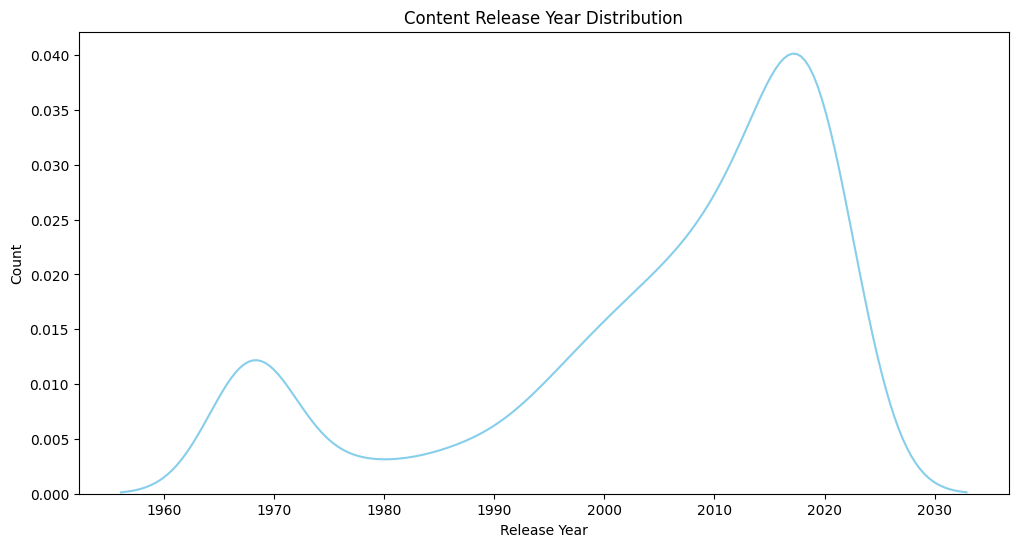

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['release_year'],  color="skyblue")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Content Release Year Distribution")
plt.show()


<ipython-input-116-f7cbc99efb0e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




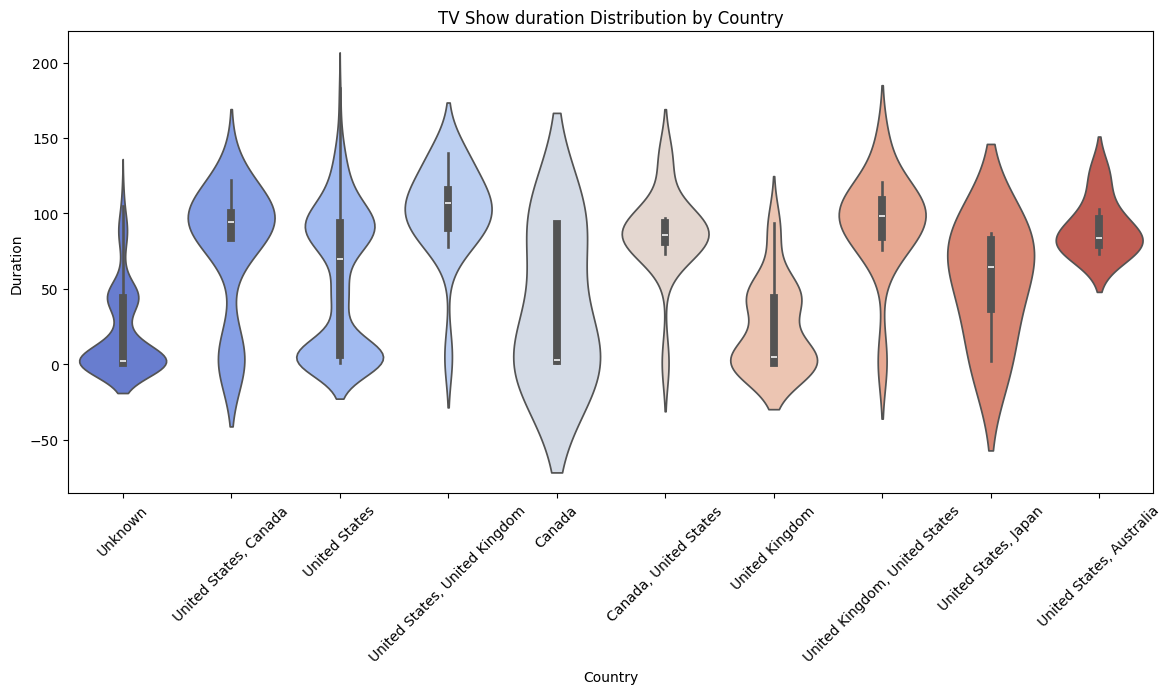

In [ ]:
plt.figure(figsize=(14, 6))
top_countries = df['country'].value_counts().index[:10]  # Select top 10 countries
df_top_countries = df[df['country'].isin(top_countries)]

sns.violinplot(x=df_top_countries['country'], y=df_top_countries['duration'], palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Duration")
plt.title("TV Show duration Distribution by Country")
plt.xticks(rotation=45)
plt.show()


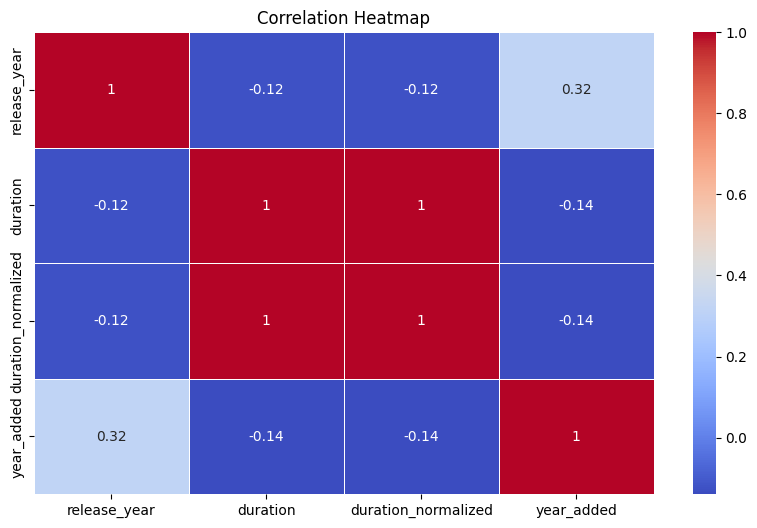

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-118-a8ed926b3c49>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




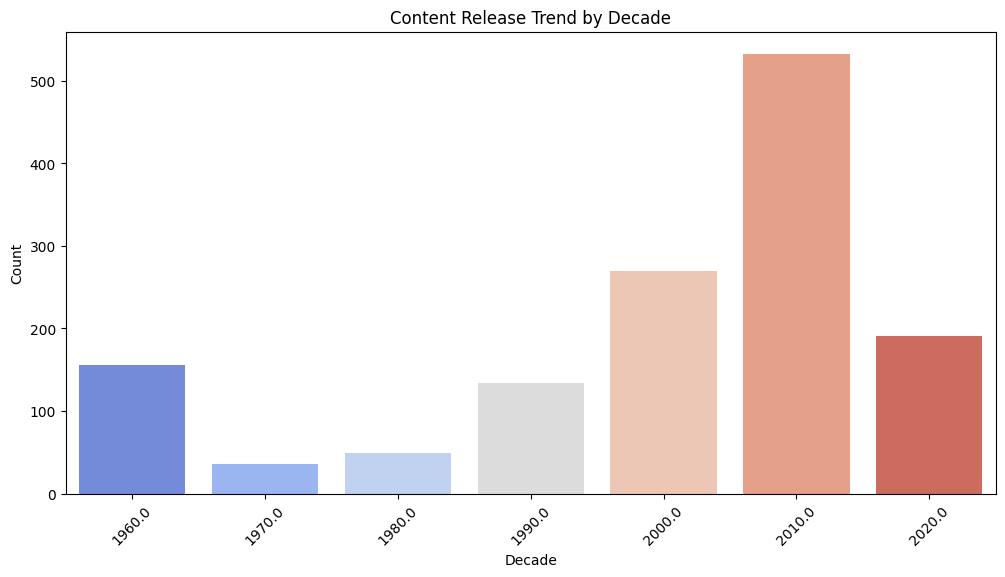

In [ ]:
df['release_decade'] = (df['release_year'] // 10) * 10  # Group by decades

# Plot the distribution of content per decade
plt.figure(figsize=(12, 6))
sns.countplot(x=df['release_decade'], palette="coolwarm")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.title("Content Release Trend by Decade")
plt.xticks(rotation=45)
plt.show()


Movies and TV shows have been grouped by decades, showing content production trends over time.


<ipython-input-119-d64709e78377>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




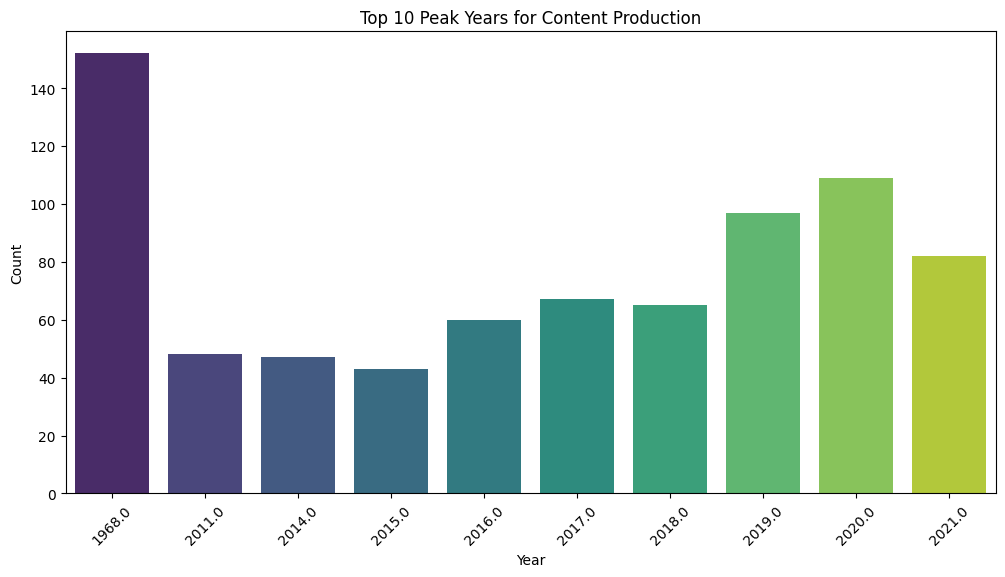

In [ ]:
plt.figure(figsize=(12, 6))
top_years = df['release_year'].value_counts().nlargest(10)  # Top 10 peak years

sns.barplot(x=top_years.index, y=top_years.values, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Top 10 Peak Years for Content Production")
plt.xticks(rotation=45)
plt.show()


Identified the top 10 years with the highest number of releases, providing insights into the most active periods for content creation.




# ***SUMMARY***



✅ Dataset Exploration

Loaded and explored the dataset to understand the structure, missing values, and key attributes.

✅ Data Cleaning & Preprocessing

Checked for missing values and handled them.
Converted date fields into a proper format.
Standardized column names and data types.

✅ Exploratory Data Analysis (EDA)

Visualized content distribution between Movies vs. TV Shows.

Identified the most common genres on the platform.

Analyzed content distribution by country.

Examined trends in content release over the years.

Investigated the duration of movies and TV shows.

Found the top 10 directors and actors with the most appearances.

Mapped geographical distribution of content production.

Identified most popular genres by country.

Analyzed director-wise genre preferences.

Created correlation heatmaps to find relationships between variables.

Visualized content production trends by decade.
